# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
# Imports 
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
import scipy.stats as stats
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

# Formats my Pandas DataFrames to be more readable
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css)) 

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


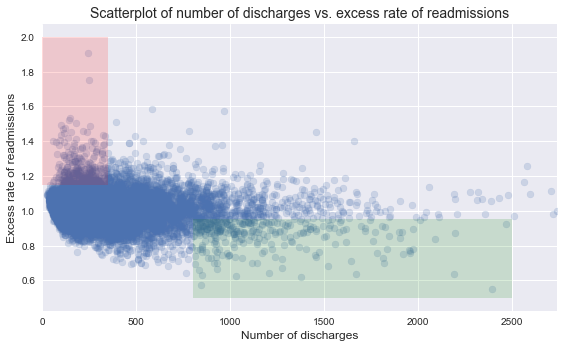

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
<div class="span5 alert alert-info">
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

# My Analysis

I am skeptical of the conclusions and policy recommendations. As I will show below, the correlation strength between number of discharges and readmission rates is extremely weak. I also suspect the potential existence of intermediary variables not measured in the data. These lead me to conclude that policy measures taken to increase hospital size are too extreme. At best, hospital size plays an extremely minor role, which does not justify devoting substantia resources to consolidating hospitals into larger ones. Other significant factors may be more directly at play and instead efforts for further research into potential intermediary variables should be conducted instead. 

Here are several potential intermediary variables that I would hypothesize would be significant. No information is provided for these by the current dataset, so further research would need to be done to determine each's influence: 

1) **Type and severity of illnesses treated:** Different illnesses, with different levels of severity, clearly would require readmission at very different rates. For example, various types of cancer would have far higher readmission rates than simple infections. It is unclear that the size of the hospital does not influence the type of illnesses treated there. For example, maybe smaller hospitals are more specialized, meaning that their patients tend to have more extreme illnesses requiring more intensive treatment, which would in turn increase readmission rates. 

Illness severity commonly lurks as a variable for statistical analysis of hospitals and treatments. For example, in the following, it was a confounding variable influencing mortality rates, which is similar to readmission rates: http://www.stat.cmu.edu/~brian/201/week06/class/mon.pdf. 

2)  **Regional and Demographic Differences in Population Served** The demographics of the local community it serves (including class, race, and gender) could also be significant intermediary variables. Additionally, the type of location (urban, suburban, or rural) may also significantly influence patient behavior and thus readmission rates. For example, if larger hospitals are typically found in urban areas or if smaller hospitals are typically found in rural communities, this difference could also factor significantly in readmission rates. In addition, if a hospital exists in a region with a higher proclivity to certain illnesses (whether due to pollution, climate, common ancestry, or something else), this could also influence the results. 

3) **Hosptital Specializations** What type of illnesses does a hospital treat? If a hospital primarily serves specialized patients previously referred from another institution, they may often have more severe illnesses. In addition, the percentage of patients in emergency room care (which I would suspect has a more typical range of illness severity than referred patients who have already received screening at another facility) could also significantly influence readmission rates. This clearly relates to potential variable 1. 

4) ** How often does a hospital admit patients and for how long?** Say certain hospitals are more likely to simply provide immediate care and then discharge a patient as opposed other hospitals which more likely to admit a patient for the same condition for an extensive period of time. This would also significantly influence readmission rates. I wonder whether the size of the hospital influences how often they admit patients. For example, maybe larger hospitals would discharge  patients at a higher rate because of their higher loads (particularly in emergency room services) because of a busier patient-load; whereas a smaller hospital is more likely to keep such a patient with a similar condition. This may influence whether patients need to or choose to come back after further complications. 

5) ** Do patients only go to one hospital or medical facility when receiving treatment?** Patients may not go to the same hospital each time for the same condition. If a patient receives further treatment at another medical facility, it is unclear whether it would be counted as readmission in this study. For example, maybe a patient initially goes to a larger hospital but is referred to a smaller, more specialized hospital given the severity of his/her condition. Then, the patient goes to that smaller hospital several times for treatment over the course of an extensive period. Thus, the readmission rate would be counted by the smaller hospital despite the fact that both did not provide adequate treatment. 

All of these (and other potential factors) could significantly bias these results and further analysis to confirm or negate their influence is neccessary, before any causual statement can be made linking hospital size with readmission rates. If true, any of these would directly contradict the policy recommendation to consolidate large hospitals into smaller ones. This assumes that the correlation relationship between hospital size and readmission rates implies simply changing hospital size would reduce readmission rates. 

As I will show below, the negative correlation relationship between discharge rates or hospital capacity with readmission rates is extremely weak, and with the potential for our factors at work, I would recommend more research to understand factors are at play before creating policy proposals. 

# Correlation Test

Here I will test whether there is a correlation between number of discharges and readmission rates. There is a very weak, negative correlation. 

(Note: I will use an alpha level of 0.01 for my analysis.) 

Here is the same graph as above with a linear regression line (aka line of best fit): 

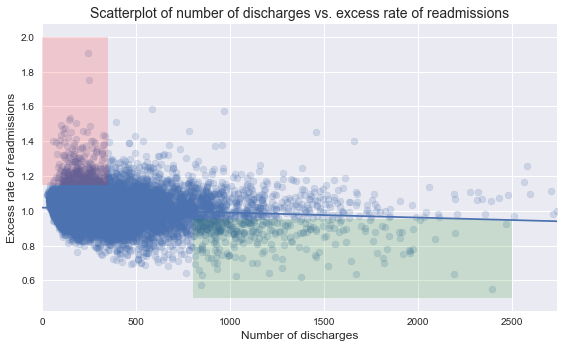

In [5]:
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

axes = plt.gca()

# Finds the line of best fit and plots the line on the graph 
m, b = np.polyfit(x, y, 1)
X_plot = np.linspace(axes.get_xlim()[0],axes.get_xlim()[1],100)
plt.plot(X_plot, m*X_plot + b, '-')

ax.grid(True)
fig.tight_layout()

# Sets alpha as 0.01
alpha = 0.01

Here is the equation and analysis for that linear regression line: 

In [6]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("Equation for Line of Best Fit: y = " + str(slope) + "x + " + str(intercept))
print("Correlation Coefficient: " + str(r_value))
print("P-value: " + str(p_value))
print("Standard Error: " + str(std_err))

Equation for Line of Best Fit: y = -2.85650529438e-05x + 1.01794755795
Correlation Coefficient: -0.0930955428759
P-value: 1.50227564266e-23
Standard Error: 2.84982482785e-06


The slope is negative, which could indiciate a negative relationship between number of discharges and hospital readmission. The Correlation Coefficient, however, is really low, which means that the relationship is at best weak, potentially non-existent. 

Given the weakness of the correlation, I also calculated the p-value to test the likeliness there is a relationship at all:

**Null Hypothesis:** There is no relationship between the number of discharges and readmission rates in the population. 

**Alternative Hypothesis:** There is a linear relationship between the number of discharges and readmission rates in the population. 

With a p-value of 1.5e-23, this is clearly less than 0.01, so I am forced to reject the null hypothesis and conclude there is a relationship. 

**Conclusion: **

Such a small p-value could indicate a relationship (likely a negative reationship) between the two, although the small correlation coefficient would indicate that the relationship is weak at best. Below, I will calculate a 99% confidence interval for the slope to determine whether it is reasonable to suspect a slope of zero (which would imply no relationship) and/or confirm whether that relationship is negative. 

## Confidence Interval of the Slope

Below, I will calculate a 99% confidence interval for the slope to determine whether it is reasonable to suspect a slope of zero (which would imply no relationship). 

In [7]:
print(str((1 - alpha)*100) + "% Confidence Interval: ")
range = 2.58*std_err
conf_int = (slope - range, slope + range)
print(conf_int)

99.0% Confidence Interval: 
(-3.5917600999675606e-05, -2.1212504887969662e-05)


There is a 99% that the actual population slope is between -3.59e-5 and -2.12e-5. Zero is not within this range, meaning that the negative relationship is likely statistically significant. 

Our estimated slope of -2.86e-5, however, is really small. Even if the variables fit the regression model perfectly (which they do not), then it would take an increase in about 10000 discharges to decrease the readmission rate by about .286. If you look at the graph above, the largest number of discharge rates is 2500, so 10000 is not a reasonable increase to expect. Increasing discharge rates would only slightly decrease readmission rates, according to the model. As a matter of fact, according to the model, an increase in hospital size would not have a measureable effecton the readmission rate (measured by going two decimal places) . This assumes that the strength of the relationship is strong, but considering that the strength of the relationship is extremely weak, it would have even less of an effect. 

# Graphical Representation

Below are two helpful graphical representation to directly see a potential for a very weak relationship between number of discharges and readmission rates.

The first shows the Kernel density. This helps see how densely filled the center is by providing contour-like coloration to indicate number of values. The scatterplot initially provided just shows a center area filled with dots but does not provide a sense of density inside of it. You can also see the distribution of each variable individually on the sides.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


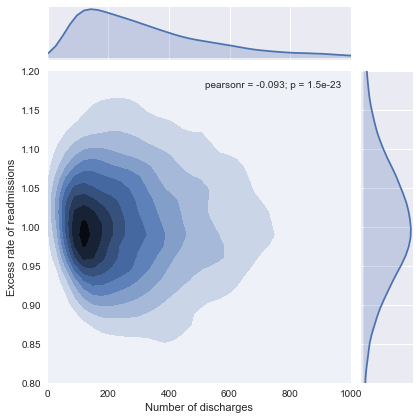

In [9]:
df = pd.DataFrame({'Number of discharges': x, 'Excess rate of readmissions': y})
sns.jointplot(x="Number of discharges", y="Excess rate of readmissions", data=df, kind="kde",  xlim={0,1000}, ylim={0.8, 1.2})

You can see that the central area most commonly fallen into by hospitals has is discharge rates less than 300 and a readmission rate around 1.00. As the number of discharges increases, readmissions rates become more varied (on both the high side and low side) and represent a smaller proportion of hospitals. 

The Preliminary Analysis highlighted hospitals with less than 300 discharages and high readmission rates, which they used to conclude that all hospitals with discharge rates less than 300 out to demonstrate the quality of their services. This graph helps demonstrate that most smaller hospitals have a reasonable readmission rate. 

The next graph provides a histogram and scatterplot version of the same data. One can see the family scatter plot from before with histograms of each variales to get a sense for each's distribution. 

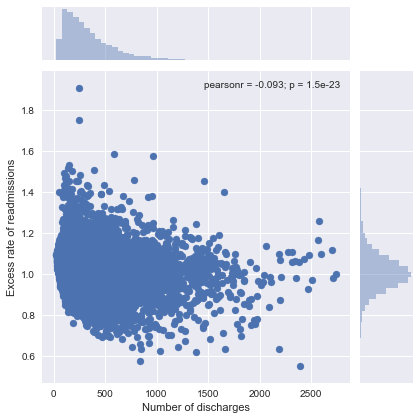

In [10]:
sns.jointplot(x="Number of discharges", y="Excess rate of readmissions", data=df)

# Conclusion

There is likely a statistically significant relationship between number of discharges (and thus hospital size) with readmission rate. By the hypothesis testing, we would have to reject a hypothesis of no relationship and the 99% confidence interval for the slope only including negative slops, a potential negative relationship is statistically significant. 

The practical influence of this relationship, however, is very weak. The correlation provides a very weak relationship and the magnitude of the slope is very small. We cannot discount an influence, but the influence is extremely slight at best and may provide only a trivial predictive and explanatory value. We cannot statistically discount the relationship but should not make sweeping conclusions from it. As spelled out in the introduction, the potential for other confounding factors is high, which could explain the slight relationship between these two variables. 

Thus, we cannot conclude that hospitals have higher readmission rates because they are smaller. Not only would this confuse correlation and casuation, but also the weak correlation and potential for counfounding variables negate such a conclusion. Thus, we cannot conclude that policies designed to increase hospital size will likley have an effect on readmission rates. 

By the linear model, the estimated change by increasing hospital size (aka increasing hospita discharge rates) would not lead to a noticeable decrease in readmission rates. If the model described the data perfectly, the change would be negligible, meaning that given the inexactness of the fit, the actual change would be even less impactful.  